In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df= pd.read_csv("datasets/banknotes.csv")

In [3]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [6]:
x = df.drop("Class",axis = 1)

#output label

y = df["Class"]

##### Cross Validation

In [8]:
from sklearn.model_selection import train_test_split

x_train ,x_test,y_train ,y_test = train_test_split(x ,y,random_state = 0)


##### BUild thw model

In [14]:
from sklearn.ensemble import RandomForestClassifier

#created object
clf_rf =  RandomForestClassifier(random_state=0 , n_estimators= 10)

In [15]:
clf_rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [18]:
##### Performance Evaluation

In [19]:
y_pred = clf_rf.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [21]:
print(confusion_matrix(y_test,y_pred))

[[193   2]
 [  0 148]]


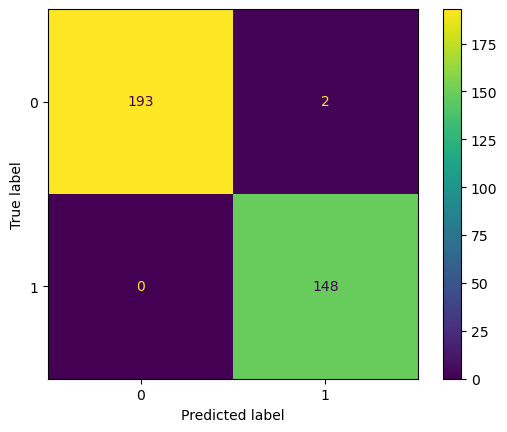

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [23]:
accuracy_score(y_test,y_pred) 

0.9941690962099126

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       195
           1       0.99      1.00      0.99       148

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [26]:
clf_rf.estimators_       #objects 

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_features='sqrt', random_state=1537364731),
 DecisionTreeClassifier(max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491434855),
 DecisionTreeClassifier(max_features='sqrt', random_state=1819583497),
 DecisionTreeClassifier(max_features='sqrt', random_state=530702035)]

In [27]:
from sklearn.tree import plot_tree

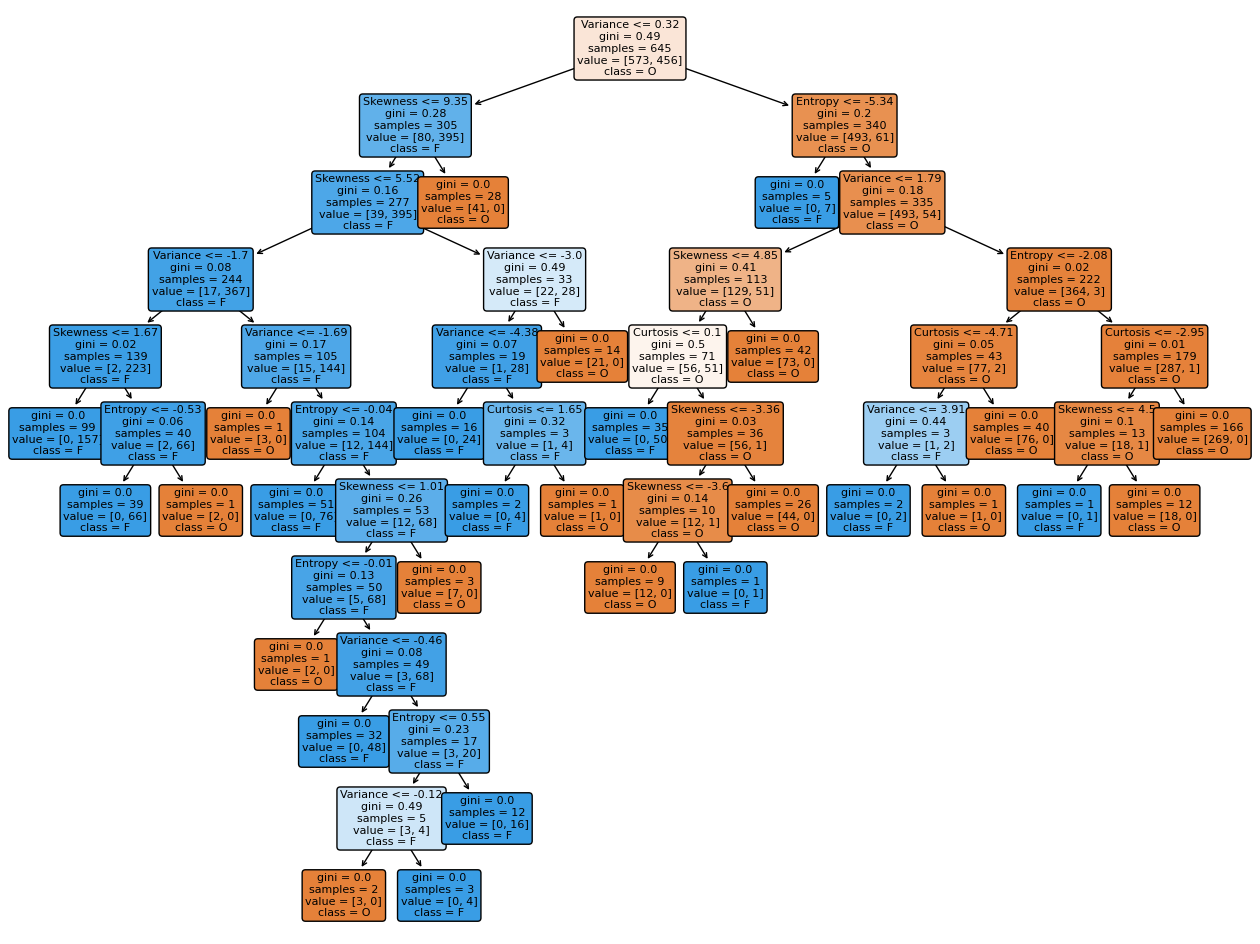

In [28]:
plt.figure(figsize=(16,12))             #For Clearity
plot_tree(clf_rf.estimators_[3] , fontsize = 8 , feature_names=x.columns,filled = True ,precision =2 , class_names = ["O","F"],rounded = True);
plt.savefig("tree3.png") 

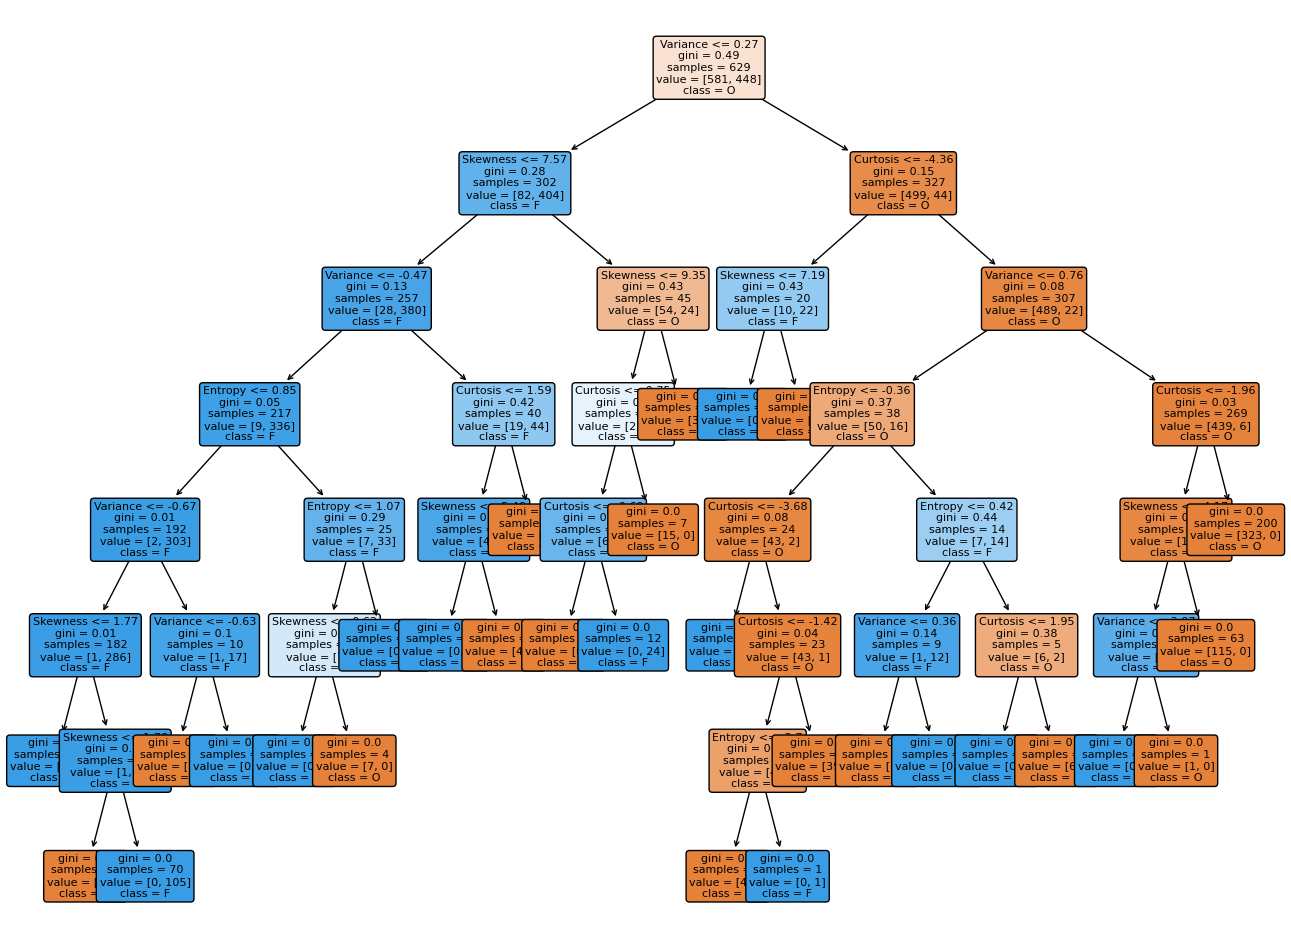

In [30]:
plt.figure(figsize=(16,12))             #For Clearity
plot_tree(clf_rf.estimators_[9] , fontsize = 8 , feature_names=x.columns,filled = True ,precision =2 , class_names = ["O","F"],rounded = True);

plt.savefig("tree10.png")

In [31]:
%%time
clf_rf.fit(x_train,y_train)

CPU times: total: 31.2 ms
Wall time: 21 ms


RandomForestClassifier(n_estimators=10, random_state=0)

In [32]:
from sklearn.tree import DecisionTreeClassifier

#created object
clf_treer =  DecisionTreeClassifier(random_state=0)

In [35]:
%%time
clf_treer.fit(x_train,y_train)

CPU times: total: 0 ns
Wall time: 3 ms


DecisionTreeClassifier(random_state=0)

In [36]:
import time

In [37]:
time.time()

1720681312.527108

In [38]:
time.asctime()

'Thu Jul 11 12:34:46 2024'

In [41]:
start = time.time()

print("Hello World")

end = time.time()


Hello World


In [42]:
end - start

0.0

In [45]:
start = time.time()
clf_treer.fit(x_train,y_train)
end = time.time()
print("Decision Tree:",end - start)

start = time.time()
clf_rf.fit(x_train,y_train)
end = time.time()
print("Random Tree:",end - start)

Decision Tree: 0.003001689910888672
Random Tree: 0.020001649856567383


##### Prediction Time

In [46]:
start = time.time()
clf_treer.predict(x_test)
end = time.time()
print("Decision Tree:",end - start)

start = time.time()
clf_rf.predict(x_test)
end = time.time()
print("Random Tree:",end - start)

Decision Tree: 0.001094818115234375
Random Tree: 0.0019996166229248047
